In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
from Memory import Storage

In [76]:
text=open('data/day5.txt').read()
N=1000

# text="""0,9 -> 5,9
# 8,0 -> 0,8
# 9,4 -> 3,4
# 2,2 -> 2,1
# 7,0 -> 7,4
# 6,4 -> 2,0
# 0,9 -> 2,9
# 3,4 -> 1,4
# 0,0 -> 8,8
# 5,5 -> 8,2
# """
# N=10

In [77]:
S=Storage()
for line in text.split('\n'):
    if not line.strip():
        continue
    parts=line.split('->')
    
    x0,y0=[int(i.strip()) for i in parts[0].split(',')]
    x1,y1=[int(i.strip()) for i in parts[1].split(',')]
    
    S+=x0,y0,x1,y1
    
x0,y0,x1,y1=S.arrays()

In [78]:
A=zeros((N,N))
for sx,sy,ex,ey in zip(x0,y0,x1,y1):
    
    if sx==ex or sy==ey:
        if N<20:
            print(sx,sy,ex,ey)
        if sx>ex:
            sx,ex=ex,sx
            sy,ey=ey,sy
        if sy>ey:
            sx,ex=ex,sx
            sy,ey=ey,sy
        
        A[sy:(ey+1),sx:(ex+1)]+=1
        
if N<20:
    print(A)

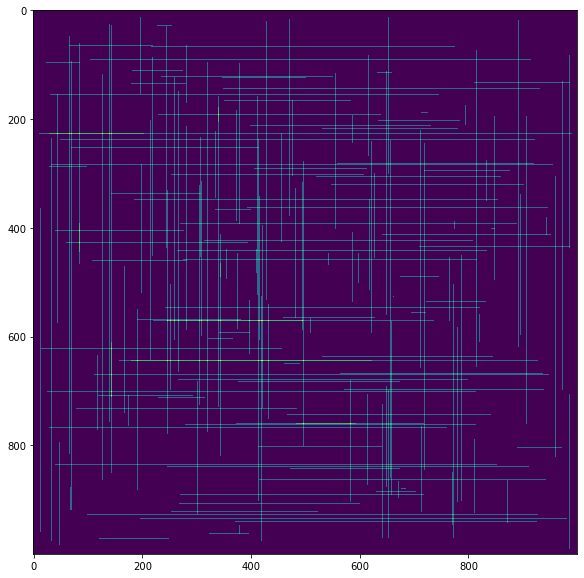

In [79]:
figure(figsize=(10,10))
imshow(A,interpolation='none')

In [80]:
len(where(A.ravel()>=2)[0])

5092

In [81]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
A=zeros((N,N))
for sx,sy,ex,ey in zip(x0,y0,x1,y1):
    
    if sx==ex or sy==ey:
        if sx>ex:
            sx,ex=ex,sx
            sy,ey=ey,sy
        if sy>ey:
            sx,ex=ex,sx
            sy,ey=ey,sy
        
        if N<20:
            print(sx,sy,ex,ey)
        A[sy:(ey+1),sx:(ex+1)]+=1
    else:  # diagonal
        ix,iy=sx,sy
        step_x=sign(ex-sx)
        step_y=sign(ey-sy)
        
        if N<20:
            print(sx,sy,ex,ey)
            print("\t",ix,iy,step_x,step_y)
        
        while ix!=ex:
            A[iy,ix]+=1
            ix+=step_x
            iy+=step_y
        A[ey,ex]+=1
        
if N<20:
    print(A)

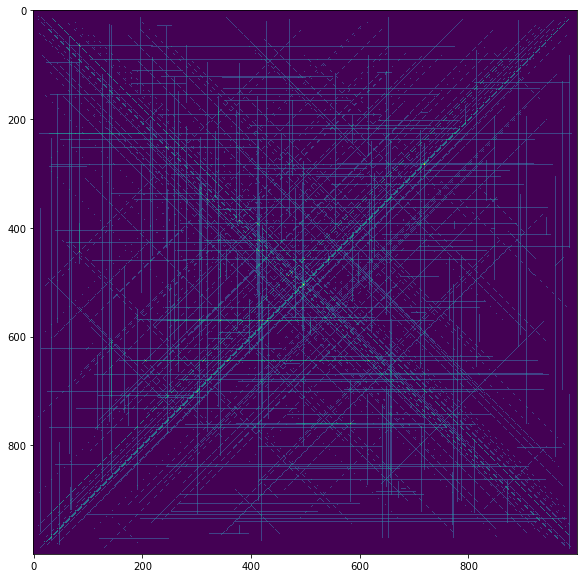

In [83]:
figure(figsize=(10,10))
imshow(A,interpolation='none')

In [84]:
len(where(A.ravel()>=2)[0])

20484